In [6]:
import pandas as pd
import numpy as np
import os
import time
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

# --- Clean TensorFlow Logs ---
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TF backend warnings
tf.get_logger().setLevel('ERROR')         # Suppress Keras training output

# --- Load Dataset ---
df = pd.read_csv("Insitu_nan_row_removed.csv", na_values="Nan")
date_cols = df.columns[2:]
dates = pd.to_datetime(date_cols, format="%Y-%m")

# --- RNN Configuration ---
n_steps = 12
epochs = 20
batch_size = 16
chunk_size = 100  # Process 100 rows at a time

# --- Create Output Folder ---
output_dir = "rnn_predictions"
os.makedirs(output_dir, exist_ok=True)

# --- Process in Chunks ---
for start in range(0, len(df), chunk_size):
    end = min(start + chunk_size, len(df))
    df_batch = df.iloc[start:end]
    start_time = time.time()

    print(f"\n🔄 Processing locations {start} to {end - 1} ...")
    batch_predictions = []

    for idx, row in tqdm(df_batch.iterrows(), total=len(df_batch), desc=f"RNNs {start}:{end}", leave=True):
        location = (row['Lat'], row['Lon'])
        y_series = row[date_cols].astype(float).values

        if np.count_nonzero(~np.isnan(y_series)) < n_steps + 1:
            continue

        mask = ~np.isnan(y_series)
        y_valid = y_series[mask]
        time_valid = dates[mask]

        # Normalize values
        scaler = MinMaxScaler()
        y_scaled = scaler.fit_transform(y_valid.reshape(-1, 1)).flatten()

        # Prepare sequences
        X, y = [], []
        for i in range(len(y_scaled) - n_steps):
            X.append(y_scaled[i:i + n_steps])
            y.append(y_scaled[i + n_steps])
        X, y = np.array(X), np.array(y)
        X = X.reshape((X.shape[0], X.shape[1], 1))

        # RNN Model
        model = Sequential([
            Input(shape=(n_steps, 1)),
            SimpleRNN(64, activation='tanh'),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')
        model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)

        # Predict
        y_pred_scaled = model.predict(X, verbose=0)
        y_pred = scaler.inverse_transform(y_pred_scaled)

        pred_dates = time_valid[n_steps:]
        for d, p in zip(pred_dates, y_pred.flatten()):
            batch_predictions.append({
                "Lat": location[0],
                "Lon": location[1],
                "Date": d.strftime("%Y-%m"),
                "Predicted_Temperature": p
            })

    # Save predictions
    output_file = f"rnn_preds_{start}_{end - 1}.csv"
    output_path = os.path.join(output_dir, output_file)
    pd.DataFrame(batch_predictions).to_csv(output_path, index=False)

    # Summary log
    total_time = time.time() - start_time
    print(f"\n✅ Finished training RNNs for locations {start} to {end - 1}")
    print(f"⏱️ Time taken: {total_time:.2f} seconds")
    print(f"📁 Output saved to: {output_path}")



🔄 Processing locations 0 to 99 ...


RNNs 0:100: 100%|██████████| 100/100 [02:43<00:00,  1.64s/it]



✅ Finished training RNNs for locations 0 to 99
⏱️ Time taken: 163.99 seconds
📁 Output saved to: rnn_predictions\rnn_preds_0_99.csv

🔄 Processing locations 100 to 199 ...


RNNs 100:200: 100%|██████████| 100/100 [02:36<00:00,  1.56s/it]



✅ Finished training RNNs for locations 100 to 199
⏱️ Time taken: 156.19 seconds
📁 Output saved to: rnn_predictions\rnn_preds_100_199.csv

🔄 Processing locations 200 to 299 ...


RNNs 200:300: 100%|██████████| 100/100 [02:20<00:00,  1.41s/it]



✅ Finished training RNNs for locations 200 to 299
⏱️ Time taken: 140.71 seconds
📁 Output saved to: rnn_predictions\rnn_preds_200_299.csv

🔄 Processing locations 300 to 399 ...


RNNs 300:400: 100%|██████████| 100/100 [02:35<00:00,  1.56s/it]



✅ Finished training RNNs for locations 300 to 399
⏱️ Time taken: 155.74 seconds
📁 Output saved to: rnn_predictions\rnn_preds_300_399.csv

🔄 Processing locations 400 to 499 ...


RNNs 400:500: 100%|██████████| 100/100 [02:29<00:00,  1.49s/it]



✅ Finished training RNNs for locations 400 to 499
⏱️ Time taken: 149.47 seconds
📁 Output saved to: rnn_predictions\rnn_preds_400_499.csv

🔄 Processing locations 500 to 599 ...


RNNs 500:600: 100%|██████████| 100/100 [02:30<00:00,  1.50s/it]



✅ Finished training RNNs for locations 500 to 599
⏱️ Time taken: 150.47 seconds
📁 Output saved to: rnn_predictions\rnn_preds_500_599.csv

🔄 Processing locations 600 to 699 ...


RNNs 600:700: 100%|██████████| 100/100 [02:19<00:00,  1.40s/it]



✅ Finished training RNNs for locations 600 to 699
⏱️ Time taken: 139.99 seconds
📁 Output saved to: rnn_predictions\rnn_preds_600_699.csv

🔄 Processing locations 700 to 799 ...


RNNs 700:800: 100%|██████████| 100/100 [03:14<00:00,  1.95s/it]



✅ Finished training RNNs for locations 700 to 799
⏱️ Time taken: 195.00 seconds
📁 Output saved to: rnn_predictions\rnn_preds_700_799.csv

🔄 Processing locations 800 to 899 ...


RNNs 800:900: 100%|██████████| 100/100 [02:24<00:00,  1.45s/it]



✅ Finished training RNNs for locations 800 to 899
⏱️ Time taken: 144.65 seconds
📁 Output saved to: rnn_predictions\rnn_preds_800_899.csv

🔄 Processing locations 900 to 922 ...


RNNs 900:923: 100%|██████████| 23/23 [00:33<00:00,  1.46s/it]


✅ Finished training RNNs for locations 900 to 922
⏱️ Time taken: 33.51 seconds
📁 Output saved to: rnn_predictions\rnn_preds_900_922.csv


C:\Users\sridh\AppData\Local\Temp\ipykernel_14624\3482144014.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


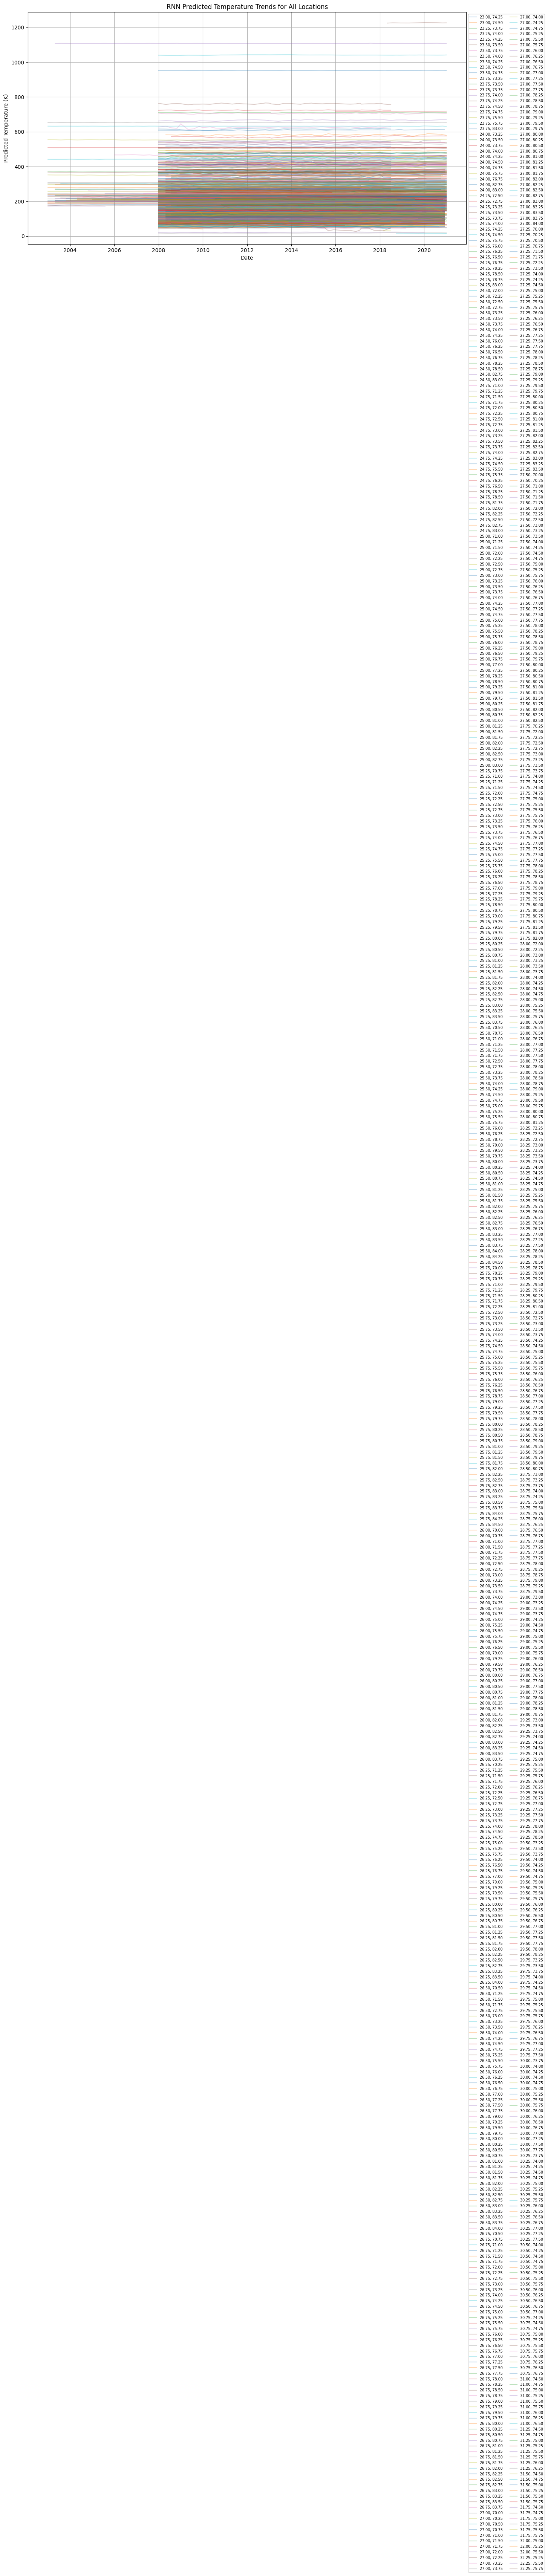

✅ Combined plot saved as all_locations_combined_plot.png


In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# --- Folder where prediction CSVs are stored ---
input_dir = "rnn_predictions"

# --- Load all CSV files ---
all_dfs = []
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(input_dir, file))
        all_dfs.append(df)

# Combine into one DataFrame
combined_df = pd.concat(all_dfs)
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format="%Y-%m")

# --- Start plotting ---
plt.figure(figsize=(15, 8))

# Plot each location
for (lat, lon), group in combined_df.groupby(['Lat', 'Lon']):
    group = group.sort_values(by='Date')
    plt.plot(group['Date'], group['Predicted_Temperature'], alpha=0.3, label=f'{lat:.2f}, {lon:.2f}')

plt.title("RNN Predicted Temperature Trends for All Locations")
plt.xlabel("Date")
plt.ylabel("Predicted Temperature (K)")
plt.grid(True)
plt.legend(loc='upper left', fontsize='x-small', ncol=2, bbox_to_anchor=(1, 1))
plt.tight_layout()

# Save or show plot
plt.savefig("all_locations_combined_plot.png", dpi=300)
plt.show()

print("✅ Combined plot saved as all_locations_combined_plot.png")


In [11]:
import pandas as pd
import numpy as np
import os
import time
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Bidirectional
from sklearn.preprocessing import MinMaxScaler

# --- Clean TensorFlow Logs ---
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TF backend warnings
tf.get_logger().setLevel('ERROR')         # Suppress Keras training output

# --- Load Dataset ---
df = pd.read_csv("Insitu_nan_row_removed.csv", na_values="Nan")
date_cols = df.columns[2:]
dates = pd.to_datetime(date_cols, format="%Y-%m")

# --- RNN Configuration ---
n_steps = 12
epochs = 20
batch_size = 16
chunk_size = 100  # Process 100 rows at a time

# --- Create Output Folder ---
output_dir = "birnn_predictions"
os.makedirs(output_dir, exist_ok=True)

# --- Process in Chunks ---
for start in range(0, len(df), chunk_size):
    end = min(start + chunk_size, len(df))
    df_batch = df.iloc[start:end]
    start_time = time.time()

    print(f"\n🔄 Processing locations {start} to {end - 1} ...")
    batch_predictions = []

    for idx, row in tqdm(df_batch.iterrows(), total=len(df_batch), desc=f"RNNs {start}:{end}", leave=True):
        location = (row['Lat'], row['Lon'])
        y_series = row[date_cols].astype(float).values

        if np.count_nonzero(~np.isnan(y_series)) < n_steps + 1:
            continue

        mask = ~np.isnan(y_series)
        y_valid = y_series[mask]
        time_valid = dates[mask]

        # Normalize values
        scaler = MinMaxScaler()
        y_scaled = scaler.fit_transform(y_valid.reshape(-1, 1)).flatten()

        # Prepare sequences
        X, y = [], []
        for i in range(len(y_scaled) - n_steps):
            X.append(y_scaled[i:i + n_steps])
            y.append(y_scaled[i + n_steps])
        X, y = np.array(X), np.array(y)
        X = X.reshape((X.shape[0], X.shape[1], 1))

        # RNN Model
        model = Sequential([
            Input(shape=(n_steps, 1)),
            Bidirectional(SimpleRNN(64, activation='tanh')),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse')
        model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)

        # Predict
        y_pred_scaled = model.predict(X, verbose=0)
        y_pred = scaler.inverse_transform(y_pred_scaled)

        pred_dates = time_valid[n_steps:]
        for d, p in zip(pred_dates, y_pred.flatten()):
            batch_predictions.append({
                "Lat": location[0],
                "Lon": location[1],
                "Date": d.strftime("%Y-%m"),
                "Predicted_Temperature": p
            })

    # Save predictions
    output_file = f"rnn_preds_{start}_{end - 1}.csv"
    output_path = os.path.join(output_dir, output_file)
    pd.DataFrame(batch_predictions).to_csv(output_path, index=False)

    # Summary log
    total_time = time.time() - start_time
    print(f"\n✅ Finished training RNNs for locations {start} to {end - 1}")
    print(f"⏱️ Time taken: {total_time:.2f} seconds")
    print(f"📁 Output saved to: {output_path}")



🔄 Processing locations 0 to 99 ...


RNNs 0:100: 100%|██████████| 100/100 [04:17<00:00,  2.58s/it]



✅ Finished training RNNs for locations 0 to 99
⏱️ Time taken: 257.81 seconds
📁 Output saved to: birnn_predictions\rnn_preds_0_99.csv

🔄 Processing locations 100 to 199 ...


RNNs 100:200: 100%|██████████| 100/100 [04:35<00:00,  2.75s/it]



✅ Finished training RNNs for locations 100 to 199
⏱️ Time taken: 275.47 seconds
📁 Output saved to: birnn_predictions\rnn_preds_100_199.csv

🔄 Processing locations 200 to 299 ...


RNNs 200:300: 100%|██████████| 100/100 [03:37<00:00,  2.18s/it]



✅ Finished training RNNs for locations 200 to 299
⏱️ Time taken: 217.89 seconds
📁 Output saved to: birnn_predictions\rnn_preds_200_299.csv

🔄 Processing locations 300 to 399 ...


RNNs 300:400: 100%|██████████| 100/100 [03:21<00:00,  2.01s/it]



✅ Finished training RNNs for locations 300 to 399
⏱️ Time taken: 201.38 seconds
📁 Output saved to: birnn_predictions\rnn_preds_300_399.csv

🔄 Processing locations 400 to 499 ...


RNNs 400:500: 100%|██████████| 100/100 [05:59<00:00,  3.60s/it]



✅ Finished training RNNs for locations 400 to 499
⏱️ Time taken: 359.59 seconds
📁 Output saved to: birnn_predictions\rnn_preds_400_499.csv

🔄 Processing locations 500 to 599 ...


RNNs 500:600: 100%|██████████| 100/100 [03:46<00:00,  2.26s/it]



✅ Finished training RNNs for locations 500 to 599
⏱️ Time taken: 226.48 seconds
📁 Output saved to: birnn_predictions\rnn_preds_500_599.csv

🔄 Processing locations 600 to 699 ...


RNNs 600:700: 100%|██████████| 100/100 [05:57<00:00,  3.58s/it]



✅ Finished training RNNs for locations 600 to 699
⏱️ Time taken: 357.88 seconds
📁 Output saved to: birnn_predictions\rnn_preds_600_699.csv

🔄 Processing locations 700 to 799 ...


RNNs 700:800: 100%|██████████| 100/100 [04:01<00:00,  2.42s/it]



✅ Finished training RNNs for locations 700 to 799
⏱️ Time taken: 241.74 seconds
📁 Output saved to: birnn_predictions\rnn_preds_700_799.csv

🔄 Processing locations 800 to 899 ...


RNNs 800:900: 100%|██████████| 100/100 [03:45<00:00,  2.26s/it]



✅ Finished training RNNs for locations 800 to 899
⏱️ Time taken: 225.74 seconds
📁 Output saved to: birnn_predictions\rnn_preds_800_899.csv

🔄 Processing locations 900 to 922 ...


RNNs 900:923: 100%|██████████| 23/23 [00:52<00:00,  2.30s/it]


✅ Finished training RNNs for locations 900 to 922
⏱️ Time taken: 52.85 seconds
📁 Output saved to: birnn_predictions\rnn_preds_900_922.csv


C:\Users\sridh\AppData\Local\Temp\ipykernel_14624\3044940728.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


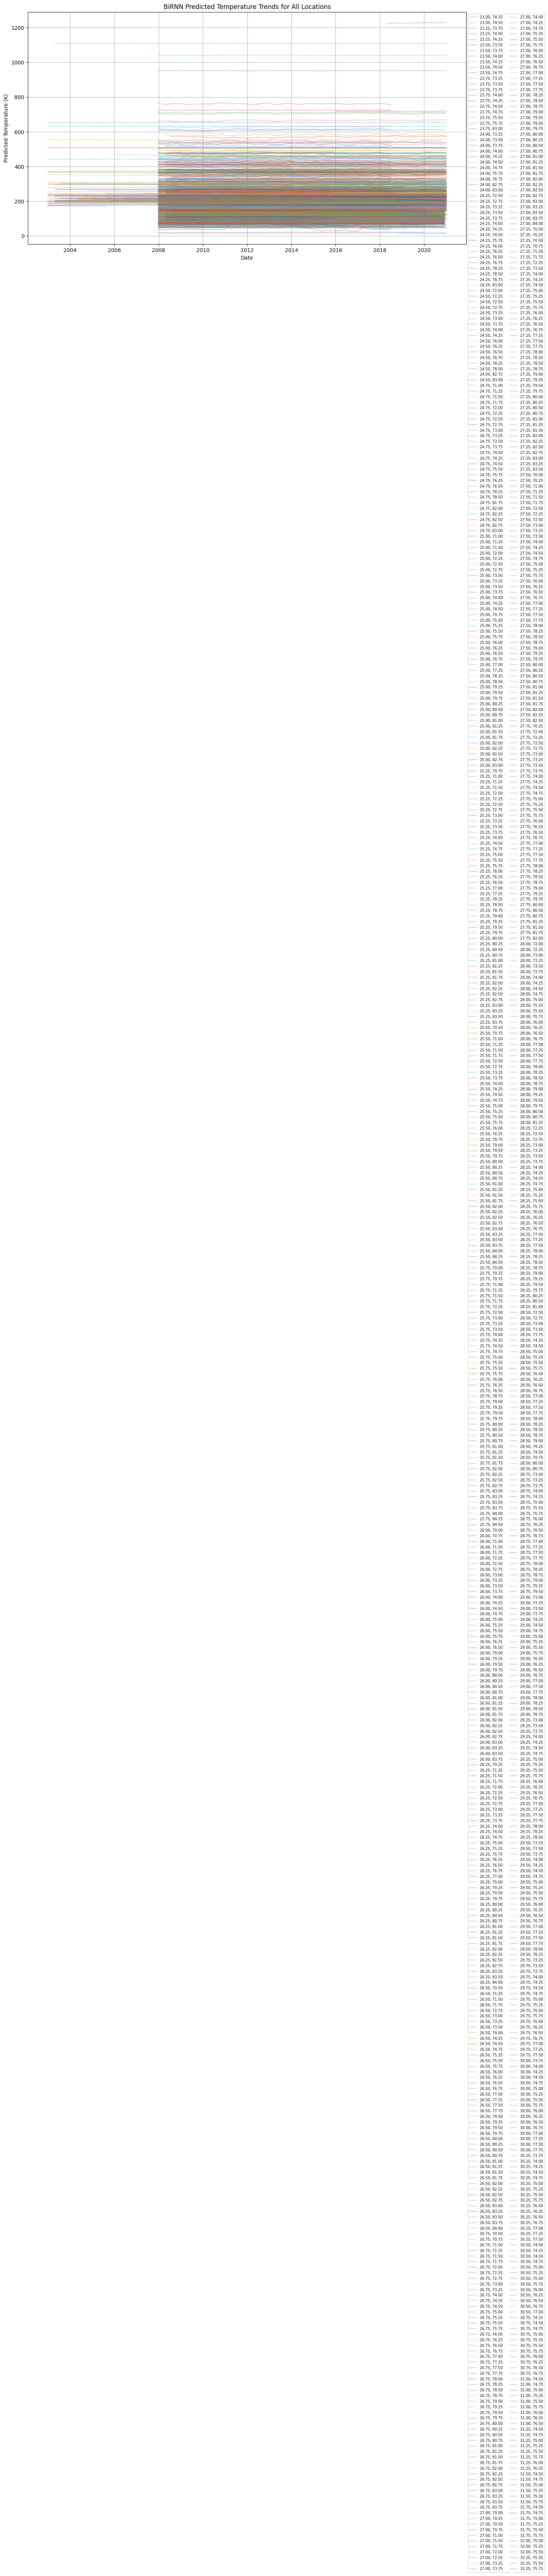

✅ Combined plot saved as all_locations_combined_plot.png


In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# --- Folder where prediction CSVs are stored ---
input_dir = "birnn_predictions"

# --- Load all CSV files ---
all_dfs = []
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(input_dir, file))
        all_dfs.append(df)

# Combine into one DataFrame
combined_df = pd.concat(all_dfs)
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format="%Y-%m")

# --- Start plotting ---
plt.figure(figsize=(15, 8))

# Plot each location
for (lat, lon), group in combined_df.groupby(['Lat', 'Lon']):
    group = group.sort_values(by='Date')
    plt.plot(group['Date'], group['Predicted_Temperature'], alpha=0.3, label=f'{lat:.2f}, {lon:.2f}')

plt.title("BiRNN Predicted Temperature Trends for All Locations")
plt.xlabel("Date")
plt.ylabel("Predicted Temperature (K)")
plt.grid(True)
plt.legend(loc='upper left', fontsize='x-small', ncol=2, bbox_to_anchor=(1, 1))
plt.tight_layout()

# Save or show plot
plt.savefig("all_locations_combined_plot.png", dpi=300)
plt.show()

print("✅ Combined plot saved as all_locations_combined_plot.png")
